## For the 3216 that we are for sure are pig: 
- How many core spp on average
- Relating between core spp found and seq depth?

In [1]:
import pandas as pd
import glob 
import os
import matplotlib.pyplot as plt

def combine_branchwater_res(dfs):
    combined = pd.concat(dfs, ignore_index=True)
    combined = combined[combined['organism'] != 'NP']
    combined = combined[combined['assay_type'] == 'WGS']

    result = (
        combined
        .value_counts(['acc', 'organism', 'bioproject'])
        .reset_index(name='count')
    )

    return result


# set the branchwater files
files = glob.glob("/group/ctbrowngrp2/amhorst/2025-pig-corespp/results/branchwater/*gtdb+mags.k21.csv")

# get df with counts of organism for each SRA 
dfs = [pd.read_csv(f, usecols=['acc', 'organism', 'assay_type', 'bioproject', 'cANI', 'containment']) for f in files]
df = combine_branchwater_res(dfs)



In [2]:
df.head()

,acc,organism,bioproject,count
0,SRR9866673,Lawsonia intracellularis,PRJNA554776,20
1,SRR11124876,pig gut metagenome,PRJNA526405,20
2,SRR11124879,pig gut metagenome,PRJNA526405,20
3,SRR11124882,pig gut metagenome,PRJNA526405,20
4,SRR25445140,metagenome,PRJNA999451,20


In [4]:
df_3216 = pd.read_csv('/group/ctbrowngrp2/amhorst/2025-pig-corespp/resources/SRA_meta.3216.csv', index_col=False)

In [5]:
df = df.merge(df_3216, on="acc")
len(df)

3202

In [13]:
df['mbases'].mean()

np.float64(5125.335727670206)

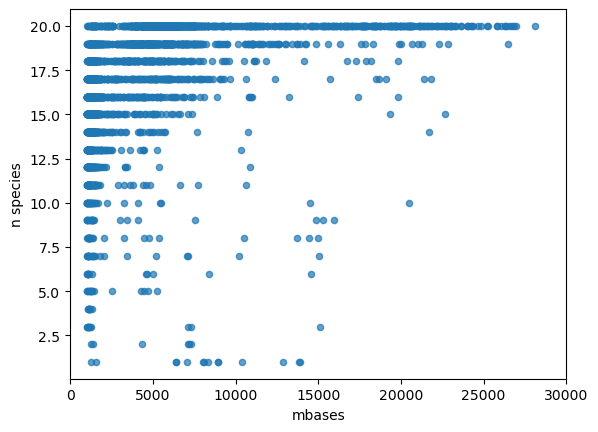

In [26]:
plt.scatter(df["mbases"], df["count"], s=20, alpha=0.7)
plt.xlabel("mbases")
plt.xlim(0, 30000)
plt.ylabel("n species")
plt.show()

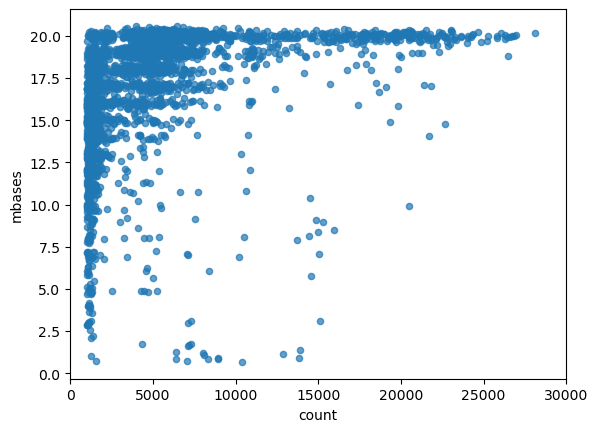

In [22]:
import numpy as np

x = df["mbases"] + np.random.normal(0, 0.2, len(df))
y = df["count"]  + np.random.normal(0, 0.2, len(df))
plt.xlim(0, 30000)

plt.scatter(x, y, s=20, alpha=0.7)
plt.xlabel("count")
plt.ylabel("mbases")
plt.show()
